# USE CASE 1: K-MEANS CLUSTERING

This is a use case on K Means clustering algorithm. We import the dataset and plot the data using matplotlib.  The kmeans algorithm is then initialized with three clusters and the data points are plotted along with the three cluster points. We then implement the kmeans algorithm from scratch and visualize each step. The number of cluster points is then changed and the corresponding plots are observed using skikit learn library

In [1]:
# EXERCISE 1: Import the data and plot it using Matplotlib

In [2]:
# Import Libraries and Data

In [3]:
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [4]:
df = pd.read_excel("clara.xlsx")

In [5]:
df.shape

(3000, 2)

In [6]:
# Data Visualization

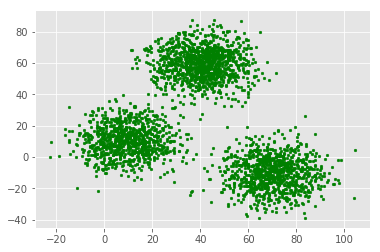

In [7]:
d1 = df['V1'].values
d2 = df['V2'].values
X = np.array(list(zip(d1, d2)))
plt.scatter(d1, d2, c='green', s=7)

In [8]:
# EXERCISE 2: Initialize three clusters and plot the three cluster points along with the dataset

In [9]:
# Number of clusters
k = 3
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-20, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

[[48. 57.]
 [ 6. 23.]
 [47. 59.]]


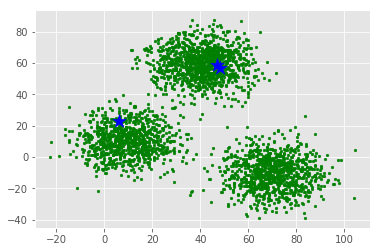

In [10]:
# Plotting along with the Centroids
plt.scatter(d1, d2, c='g', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='b')


In [11]:
# EXERCISE 3: Iteratively perform calculations and visualize each step

In [12]:
# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

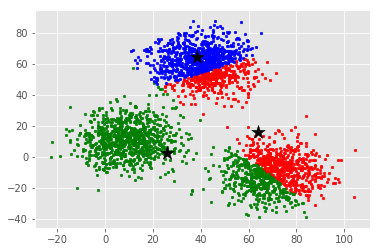

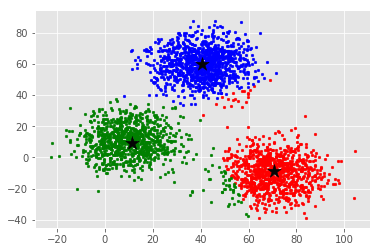

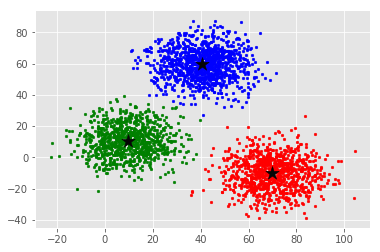

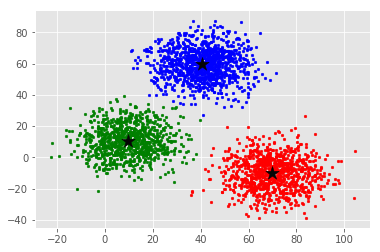

In [13]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
ctr = 0
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)
    colors = ['r', 'g', 'b', 'y', 'c', 'm']
    fig, ax = plt.subplots()
    for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
    ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')
    
    

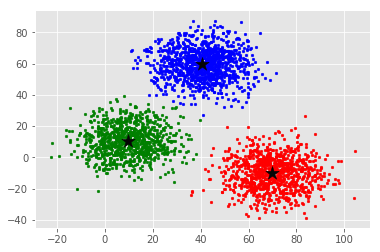

In [14]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

In [15]:
# USING SCIKIT LEARN

In [16]:
from sklearn.cluster import KMeans

# Number of clusters = 3
kmeans = KMeans(n_clusters=3)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_

In [17]:
# K-MEANS centroids

In [18]:
centroids

array([[ 69.92418447, -10.11964119],
       [ 40.68362784,  59.71589274],
       [  9.4780459 ,  10.686052  ]])

In [19]:
# K-MEANS cluster labels

In [20]:
labels

array([2, 2, 2, ..., 0, 0, 0], dtype=int32)

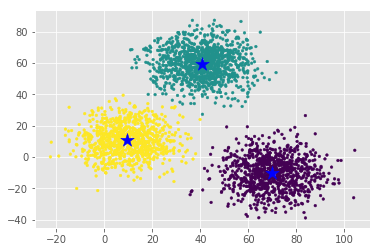

In [21]:
# Plotting along with the Centroids
plt.scatter(X[:,0], X[:,1], c=labels, s=7)
plt.scatter(centroids[:,0], centroids[:,1], marker='*', s=200, c='b')

In [22]:
# 4. Change the number of clusters and see how the plot is changing

In [23]:
# Number of clusters = 2
kmeans1 = KMeans(n_clusters=2)
# Fitting the input data
kmeans1 = kmeans1.fit(X)
# Getting the cluster labels
labels1 = kmeans1.predict(X)
# Centroid values
centroids1 = kmeans1.cluster_centers_
assignments = kmeans.labels_

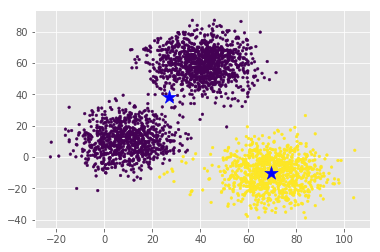

In [24]:
# Plotting along with the Centroids
plt.scatter(X[:,0], X[:,1], c=labels1, s=7)
plt.scatter(centroids1[:,0], centroids1[:,1], marker='*', s=200, c='b')

In [25]:
# Number of clusters = 4

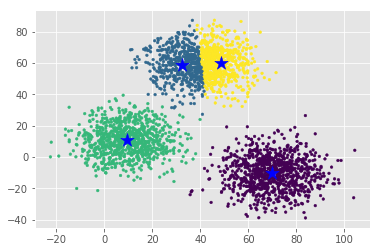

In [26]:
kmeans2 = KMeans(n_clusters=4)
# Fitting the input data
kmeans2 = kmeans2.fit(X)
# Getting the cluster labels
labels2 = kmeans2.predict(X)
# Centroid values
centroids2 = kmeans2.cluster_centers_
# Plotting along with the Centroids
plt.scatter(X[:,0], X[:,1], c=labels2, s=7)
plt.scatter(centroids2[:,0], centroids2[:,1], marker='*', s=200, c='b')

In [27]:
# Number of clusters = 5

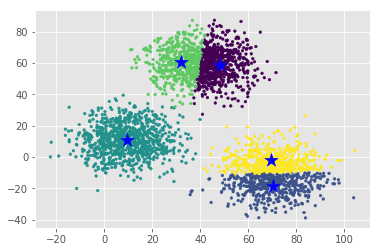

In [28]:
kmeans3 = KMeans(n_clusters=5)
# Fitting the input data
kmeans3 = kmeans3.fit(X)
# Getting the cluster labels
labels3 = kmeans3.predict(X)
# Centroid values
centroids3 = kmeans3.cluster_centers_
# Plotting along with the Centroids
plt.scatter(X[:,0], X[:,1], c=labels3, s=7)
plt.scatter(centroids3[:,0], centroids3[:,1], marker='*', s=200, c='b')